In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
#libraries for sentiment analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

#### importing required datasets 

In [39]:
stockHistory=pd.read_csv("stockHistory3.csv")
news=pd.read_csv("news2.csv")
mearged_data=pd.read_csv("processed_sentimental_data.csv")


In [40]:
stockHistory.head(5)

,Date,Open,High,Low,Close
0,03-Jan-11,20621.61,20664.80,20531.00,20561.05
1,04-Jan-11,20617.38,20651.21,20449.01,20498.72
2,05-Jan-11,20509.95,20509.95,20243.95,20301.10
3,06-Jan-11,20395.50,20425.85,20107.17,20184.74
4,07-Jan-11,20163.85,20210.62,19629.22,19691.81


In [41]:
stockHistory.tail(5)

,Date,Open,High,Low,Close
2537,30-Mar-21,49331.68,50268.45,49331.68,50136.58
2538,31-Mar-21,50049.12,50050.32,49442.50,49509.15
2539,01-Apr-21,49868.53,50092.48,49478.53,50029.83
2540,05-Apr-21,50020.91,50028.67,48580.80,49159.32
2541,06-Apr-21,49441.13,49582.26,48936.35,49201.39


In [42]:
news.head(5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [43]:
news.tail(5)

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [44]:
news.drop(["headline_category"],axis=1,inplace=True)

In [45]:
def date_value(full_date):
    dates=full_date[0:2]
    month=full_date[3:6]
    year=full_date[7:9]
    if(month=="Jan"):
        month="01"
    elif(month=="Feb"):
        month="02"
    elif(month=="Mar"):
        month="03"
    elif(month=="Apr"):
        month="04"
    elif(month=="May"):
        month="05"
    elif(month=="Jun"):
        month="06"
    elif(month=="Jul"):
        month="07"
    elif(month=="Aug"):
        month="08"
    elif(month=="Sep"):
        month="09"
    elif(month=="Oct"):
        month="10"
    elif(month=="Nov"):
        month="11"
    elif(month=="Dec"):
        month="12"
    year="20"+year
    num=int(year+month+dates)
    return num
for k in range(stockHistory.shape[0]):
    stockHistory["Date"][k]=date_value(stockHistory["Date"][k])

C:\Users\work\Anaconda2\envs\gl-envs\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### visualizing data

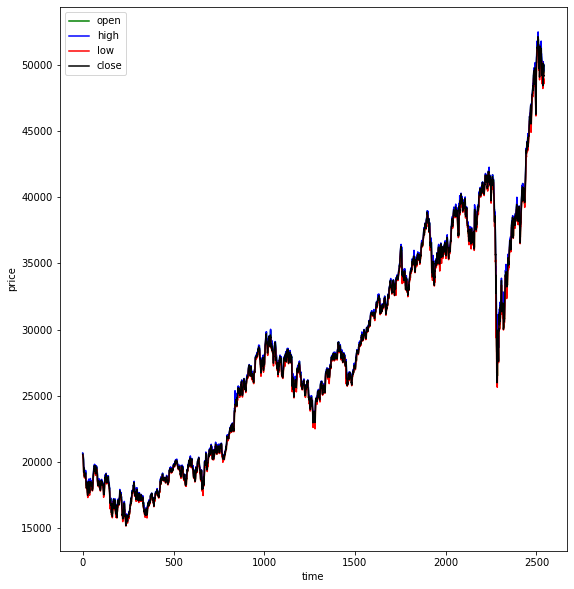

In [46]:
pyt.figure(figsize=(20,10))
pyt.subplot(1,2,1)
pyt.plot(stockHistory["Open"].values,color='green',label="open")
pyt.plot(stockHistory["High"].values,color="blue",label="high")
pyt.plot(stockHistory["Low"].values,color="red",label="low")
pyt.plot(stockHistory["Close"].values,color="black",label="close")
pyt.xlabel("time")
pyt.ylabel("price")
pyt.legend(loc="best")
pyt.show()

In [47]:
scaler=MinMaxScaler()
mearged_data["Open"]=scaler.fit_transform(mearged_data["Open"].values.reshape(-1,1))
mearged_data["High"]=scaler.fit_transform(mearged_data["High"].values.reshape(-1,1))
mearged_data["Low"]=scaler.fit_transform(mearged_data["Low"].values.reshape(-1,1))
mearged_data["Close"]=scaler.fit_transform(mearged_data["Close"].values.reshape(-1,1))

### removing unrequired news 

In [48]:
"""
#code to know index of some row for checking
i=0
while(int(news.iloc[i,0])!=20110101):
    i=i+1
"""


data=news.iloc[1034212:,0:3].values

In [49]:
data[0:4,0:2]

array([[20110101, 'Men who rocked TV in 2010'],
       [20110101, 'RA.One: Arjun Rampal to play villan'],
       [20110101, "Shveta Salve's bikini shop"],
       [20110101, '3;000 tourists stranded for 12 hrs near Manali']],
      dtype=object)

In [50]:
#compiling all types of news under same date
i=0
dicts={}
total=data[i,1]
while(i!=2389854):
    if(data[i,0]==data[i+1,0]):
        total=total+data[i+1,1]
    else:
        dicts[data[i,0]]=total
        total=data[i+1,1]
    i=i+1

In [51]:
#keeping only data related to stockHistory 2477
final_news=[]
dicts_keys=list(dicts.keys())
for i in range(2542):
    for j in range(3652):
        if(stockHistory["Date"][i]==dicts_keys[j]):
            final_news.append(dicts[dicts_keys[j]])
            break   


In [52]:
final_news[0]

"Photo Gallery (Ashes 2010)Your guy needs complimenting!Are you a good roomie?Distance making the heart wonder?Sonakshi wants to do a KareenaStars to watch out for in 2011'Rio carnival' themed event in KolkataDJ Rocky G entertained Kolkata!Sheila and munni rocked the party!Rocking music; B'wood jhatkas at this doET: Top ten real estate investments for 2011Smriti goes back to schoolA fairytale proposal!Akki's Patiala House to be out soonKat: No more bimbette rolesMallika's planning a big bashIrrfan to play villain!Amrita Arora's rocking New Year bashDivya replaces Urmila in bold role?Frontman for Velvet Revolver found!Every film has to have logic: KV AnandOne World-One Life- Pyar hi Pyar!Deepa's lucky 2011 beginningScript does matters for HaripriyaDhanush is nervous for his nextTelugu movies in 2011!Can government do nothing legally to check prices?Supreme Court regrets Emergency-era verdictIAF to acquire C130J aircraft from USSaptak festival unites prodigies and stalwartsArmed dacoity 

### removing data from stockHistory after year 2020

In [53]:
stockHistory=stockHistory.drop(stockHistory.index[[i for i in range(2477,2542)]])

In [54]:
stockHistory.tail(5)

,Date,Open,High,Low,Close
2472,20201223,46072.30,46513.32,45899.10,46444.18
2473,20201224,46743.49,47053.40,46539.02,46973.54
2474,20201228,47153.59,47406.72,47148.24,47353.75
2475,20201229,47466.62,47714.55,47361.90,47613.08
2476,20201230,47789.03,47807.85,47358.36,47746.22


In [55]:
#cleaning the text data
for i in range(len(final_news)):
    final_news[i]=re.sub("[:]","",final_news[i])
    final_news[i]=re.sub("[;]","",final_news[i])

In [56]:
#putting news in stockHistory dataframe
stockHistory["news"]=final_news

In [57]:
#functions to get subjectivity and polarity
def getSubjectivity(text):
    tb=TextBlob(text)
    return tb.sentiment.subjectivity

def getPolarity(text):
    pb=TextBlob(text)
    return pb.sentiment.polarity

In [58]:
#lets apply above created function to our news
stockHistory["subjectivity"]=stockHistory["news"].apply(getSubjectivity)
stockHistory["polarity"]=stockHistory["news"].apply(getPolarity)

In [61]:
def getSIA(text):
    sa=SentimentIntensityAnalyzer()
    sentiment=sa.polarity_scores(text)
    return sentiment

#scores of sentiment for each text or day
compound=[]
pos=[]
neg=[]
neutral=[]
sia=0
for i in range(stockHistory.shape[0]):
    sia=getSIA(stockHistory["news"][i])
    compound.append(sia["compound"])
    pos.append(sia["pos"])
    neg.append(sia["neg"])
    neutral.append(sia["neu"])

In [62]:
#add above list to stockHistory2.csv
stockHistory["compound"]=compound
stockHistory["positive"]=pos
stockHistory["neg"]=neg
stockHistory["neutral"]=neutral

In [63]:
stockHistory.head(10)

,Date,Open,High,Low,Close,news,subjectivity,polarity,compound,positive,neg,neutral
0,20110103,20621.61,20664.80,20531.00,20561.05,Photo Gallery (Ashes 2010)Your guy needs compl...,0.378246,0.080201,-0.9997,0.094,0.150,0.756
1,20110104,20617.38,20651.21,20449.01,20498.72,Deepika PadukoneDeepika PadukoneImran invites ...,0.393183,0.050869,-0.9995,0.081,0.118,0.801
2,20110105,20509.95,20509.95,20243.95,20301.10,Man dies of heart attack after killing lover's...,0.399202,0.016441,-0.9998,0.076,0.137,0.787
3,20110106,20395.50,20425.85,20107.17,20184.74,Photo Gallery (Indian tour of South Africa)Rak...,0.370414,0.044693,-0.9998,0.081,0.129,0.791
4,20110107,20163.85,20210.62,19629.22,19691.81,Rishi gives look test for KJoTom Hanks to be h...,0.375318,0.048956,-0.9998,0.072,0.132,0.796
5,20110110,19714.42,19720.43,19158.43,19224.12,CartoonsRock-er-thek entertain KolkataUstad Sw...,0.411113,0.040538,-0.9994,0.081,0.112,0.807
6,20110111,19279.77,19431.56,19003.60,19196.34,Music eases stress of assisted breathingCartoo...,0.434101,0.102969,-0.9996,0.099,0.134,0.767
7,20110112,19353.34,19574.63,19048.56,19534.10,Better than your 'better' half?Tara Sharma pre...,0.404701,0.053813,-0.9997,0.089,0.134,0.778
8,20110113,19492.30,19522.38,19136.27,19182.82,Madam OvaryIs your partner a party pooper?SRK ...,0.381341,0.096152,-0.9997,0.100,0.134,0.766
9,20110114,19198.04,19447.82,18811.96,18860.44,CartoonsYamla Pagla Deewana Movie ReviewSRK ru...,0.406883,0.096823,-0.9997,0.082,0.124,0.794


In [37]:
#stockHistory.to_csv("mearged_data")
mearged_data.head(10)

,Date,Open,High,Low,Close,news,subjectivity,polarity,compound,positive,neg,neutral
0,03-Jan-11,0.160279,0.161417,0.167416,0.165360,Photo Gallery (Ashes 2010)Your guy needs compl...,0.378246,0.080201,-0.9997,0.094,0.150,0.756
1,04-Jan-11,0.160148,0.160997,0.164871,0.163447,Deepika PadukoneDeepika PadukoneImran invites ...,0.393183,0.050869,-0.9995,0.081,0.118,0.801
2,05-Jan-11,0.156828,0.156633,0.158508,0.157379,Man dies of heart attack after killing lover's...,0.399202,0.016441,-0.9998,0.076,0.137,0.787
3,06-Jan-11,0.153290,0.154034,0.154264,0.153807,Photo Gallery (Indian tour of South Africa)Rak...,0.370414,0.044693,-0.9998,0.081,0.129,0.791
4,07-Jan-11,0.146130,0.147385,0.139433,0.138673,Rishi gives look test for KJoTom Hanks to be h...,0.375318,0.048956,-0.9998,0.072,0.132,0.796
5,10-Jan-11,0.132238,0.132241,0.124824,0.124314,CartoonsRock-er-thek entertain KolkataUstad Sw...,0.411113,0.040538,-0.9994,0.081,0.112,0.807
6,11-Jan-11,0.118804,0.123316,0.120019,0.123461,Music eases stress of assisted breathingCartoo...,0.434101,0.102969,-0.9996,0.099,0.134,0.767
7,12-Jan-11,0.121078,0.127736,0.121414,0.133831,Better than your 'better' half?Tara Sharma pre...,0.404701,0.053813,-0.9997,0.089,0.134,0.778
8,13-Jan-11,0.125373,0.126122,0.124136,0.123046,Madam OvaryIs your partner a party pooper?SRK ...,0.381341,0.096152,-0.9997,0.100,0.134,0.766
9,14-Jan-11,0.116278,0.123818,0.114072,0.113148,CartoonsYamla Pagla Deewana Movie ReviewSRK ru...,0.406883,0.096823,-0.9997,0.082,0.124,0.794


###  LSTM model

In [64]:
#LSTM and rnn 
train=mearged_data.iloc[:,1:5].values

In [65]:
train_data=mearged_data.iloc[:2300,1:5].values
test_data=mearged_data.iloc[2300:,1:5].values


x_train=[]
y_train=[]

for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,3])
    y_train.append(train_data[i,3])

x_train,y_train=np.array(x_train),np.array(y_train)


x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [66]:

model=Sequential()


model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation="tanh"))

model.add(LSTM(units=50,return_sequences=True,activation="tanh"))

model.add(LSTM(units=50,return_sequences=True,activation="tanh"))

model.add(LSTM(units=50,activation="tanh"))

model.add(Dense(units=1))

model.compile(optimizer="adam",loss='mean_squared_error')


model.fit(x_train,y_train,epochs=100,batch_size=10)
"""
import pickle
with open("sppV3.pickle","rb") as r1:
    model=pickle.load(r1)
"""

Epoch 1/100
2270/2270 [==============================] - 21s 9ms/step - loss: 0.0056
Epoch 2/100
2270/2270 [==============================] - 16s 7ms/step - loss: 0.0016
Epoch 3/100
2270/2270 [==============================] - 16s 7ms/step - loss: 0.0010
Epoch 4/100
2270/2270 [==============================] - 16s 7ms/step - loss: 7.5420e-04
Epoch 5/100
2270/2270 [==============================] - 17s 7ms/step - loss: 5.5192e-04
Epoch 6/100
2270/2270 [==============================] - 16s 7ms/step - loss: 5.2314e-04
Epoch 7/100
2270/2270 [==============================] - 16s 7ms/step - loss: 4.4212e-04
Epoch 8/100
2270/2270 [==============================] - 17s 7ms/step - loss: 4.3618e-04
Epoch 9/100
2270/2270 [==============================] - 17s 7ms/step - loss: 4.3135e-04
Epoch 10/100
2270/2270 [==============================] - 17s 7ms/step - loss: 3.4422e-04
Epoch 11/100
2270/2270 [==============================] - 16s 7ms/step - loss: 3.0703e-04
Epoch 12/100
2270/2270 [=======

2270/2270 [==============================] - 17s 7ms/step - loss: 1.2456e-04
Epoch 93/100
2270/2270 [==============================] - 17s 8ms/step - loss: 1.1421e-04
Epoch 94/100
2270/2270 [==============================] - 17s 8ms/step - loss: 1.0064e-04
Epoch 95/100
2270/2270 [==============================] - 17s 7ms/step - loss: 1.0089e-04
Epoch 96/100
2270/2270 [==============================] - 17s 8ms/step - loss: 1.0277e-04
Epoch 97/100
2270/2270 [==============================] - 17s 7ms/step - loss: 1.0596e-04
Epoch 98/100
2270/2270 [==============================] - 17s 7ms/step - loss: 1.0979e-04
Epoch 99/100
2270/2270 [==============================] - 17s 8ms/step - loss: 1.1114e-04
Epoch 100/100
2270/2270 [==============================] - 17s 8ms/step - loss: 1.1261e-04


'\nimport pickle\nwith open("sppV3.pickle","rb") as r1:\n    model=pickle.load(r1)\n'

In [68]:
x_test=[]
for j in range(30,len(test_data)):
    x_test.append(test_data[j-30:j,3])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction=model.predict(x_test)

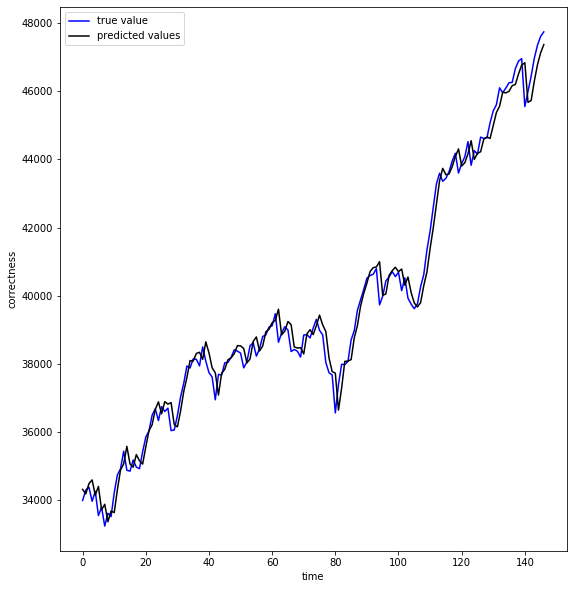

In [69]:
real=mearged_data.iloc[2330:,4].values
real=scaler.inverse_transform(real.reshape(-1,1))
prediction=scaler.inverse_transform(prediction)


#graph plot for predicted and known values
pyt.figure(figsize=(20,10))
pyt.subplot(1,2,2)
pyt.plot(real,color="blue",label="true value")
pyt.plot(prediction,color="black",label="predicted values")
pyt.xlabel("time")
pyt.ylabel("correctness")
pyt.legend()
pyt.show()

In [70]:
senti_trainX=mearged_data.iloc[:2330,[1,2,3,6,7,8,9,10,11]].values
senti_testX=mearged_data.iloc[2330:,[1,2,3,6,7,8,9,10,11]].values
senti_trainy=mearged_data.iloc[:2330,4].values
senti_testy=mearged_data.iloc[2330:,4:5].values

In [71]:
from sklearn.svm import SVR
regressor=SVR(kernel="poly",degree=2)
regressor.fit(senti_trainX,senti_trainy)

predictions2=regressor.predict(senti_testX)

predictions2=scaler.inverse_transform(predictions2.reshape(-1,1))
senti_testy=scaler.inverse_transform(senti_testy.reshape(-1,1))

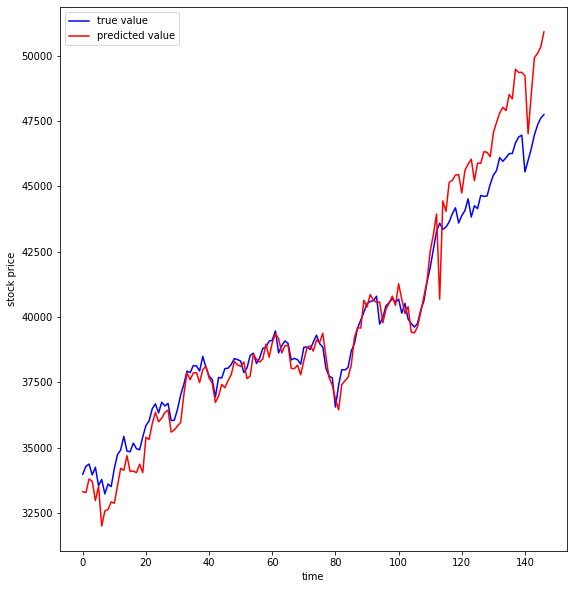

In [72]:
pyt.figure(figsize=(20,10))
pyt.subplot(1,2,2)
pyt.plot(senti_testy,color="blue",label="true value")
pyt.plot(predictions2,color="red",label="predicted value")
#pyt.plot(prediction,color="green",label="lstm")
pyt.xlabel("time")
pyt.ylabel("stock price")
pyt.legend()
pyt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor2=SVR(kernel="poly",degree=2)
regressor2=RandomForestRegressor(n_estimators=200,random_state=0)


features=np.concatenate((prediction,predictions2),axis=1)

features=scaler.fit_transform(features)


features_train=features[:130,0:3]
features_test=features[130:,0:3]

senti_train=senti_testy[:130,:]

senti_tests=senti_testy[130:,:]


senti_train=scaler.fit_transform(senti_train)

senti_train=senti_train.reshape(senti_train.shape[0],)


regressor2.fit(features_train,senti_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

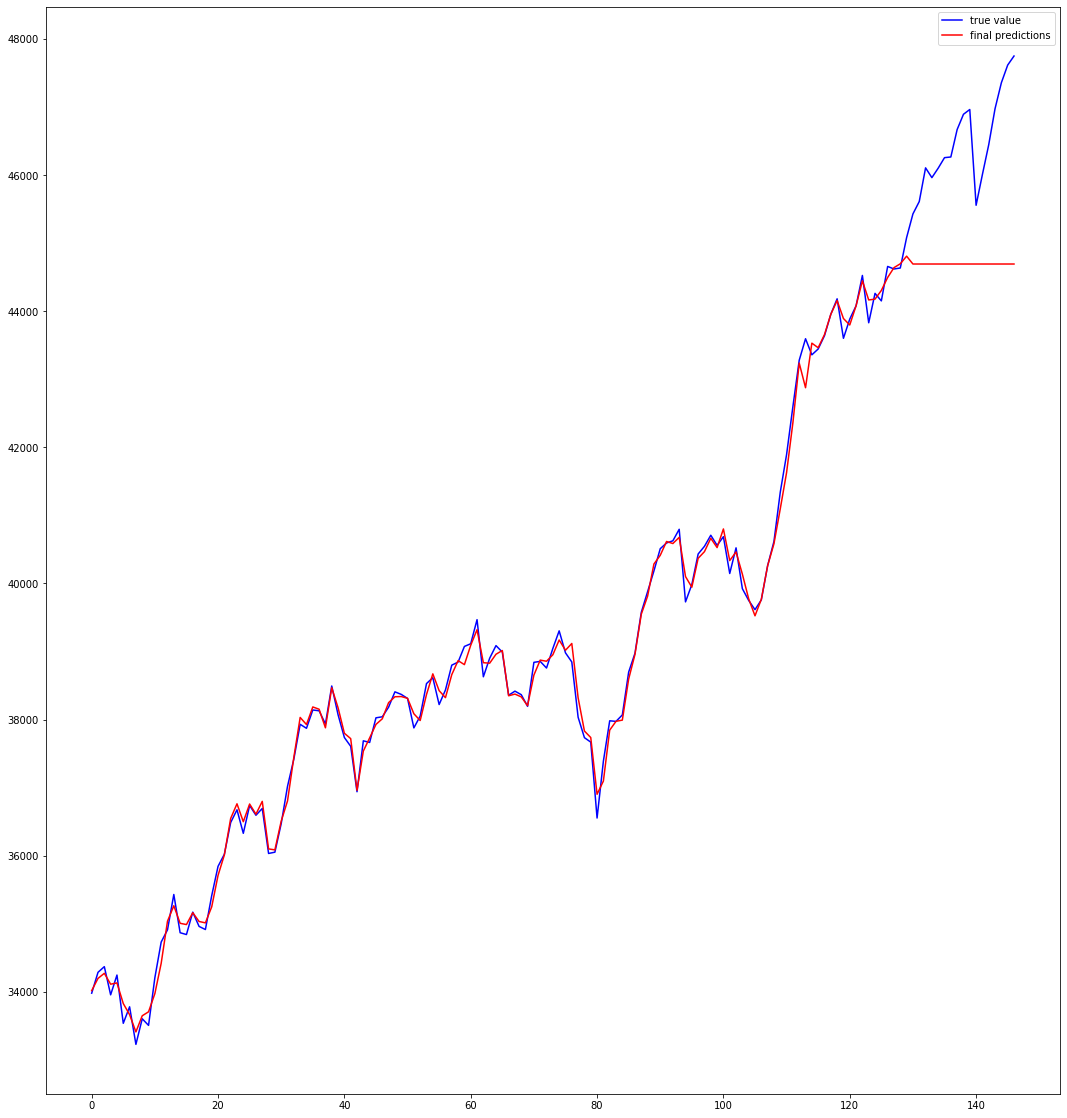

In [74]:
predictions3=regressor2.predict(features)

predictions3=scaler.inverse_transform(predictions3.reshape(-1,1))
lstm_predictions=prediction[130:,:]
senti_predictions=predictions2[130:,:]

pyt.figure(figsize=(40,20))
pyt.subplot(1,2,2)
pyt.plot(senti_testy,color="blue",label="true value")
pyt.plot(predictions3,color="red",label="final predictions")
#pyt.plot(prediction,color="black",label="lstm")
#pyt.plot(predictions2,color="green",label="sentimental predictions")
pyt.legend()
pyt.show()

In [75]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(senti_testy,prediction))
print(mean_absolute_error(senti_testy,predictions2))
print(mean_absolute_error(senti_testy,predictions3))


324.0503762755102
765.1737565560172
301.9778627231118
